Start: 1751720093
End: 1751721265


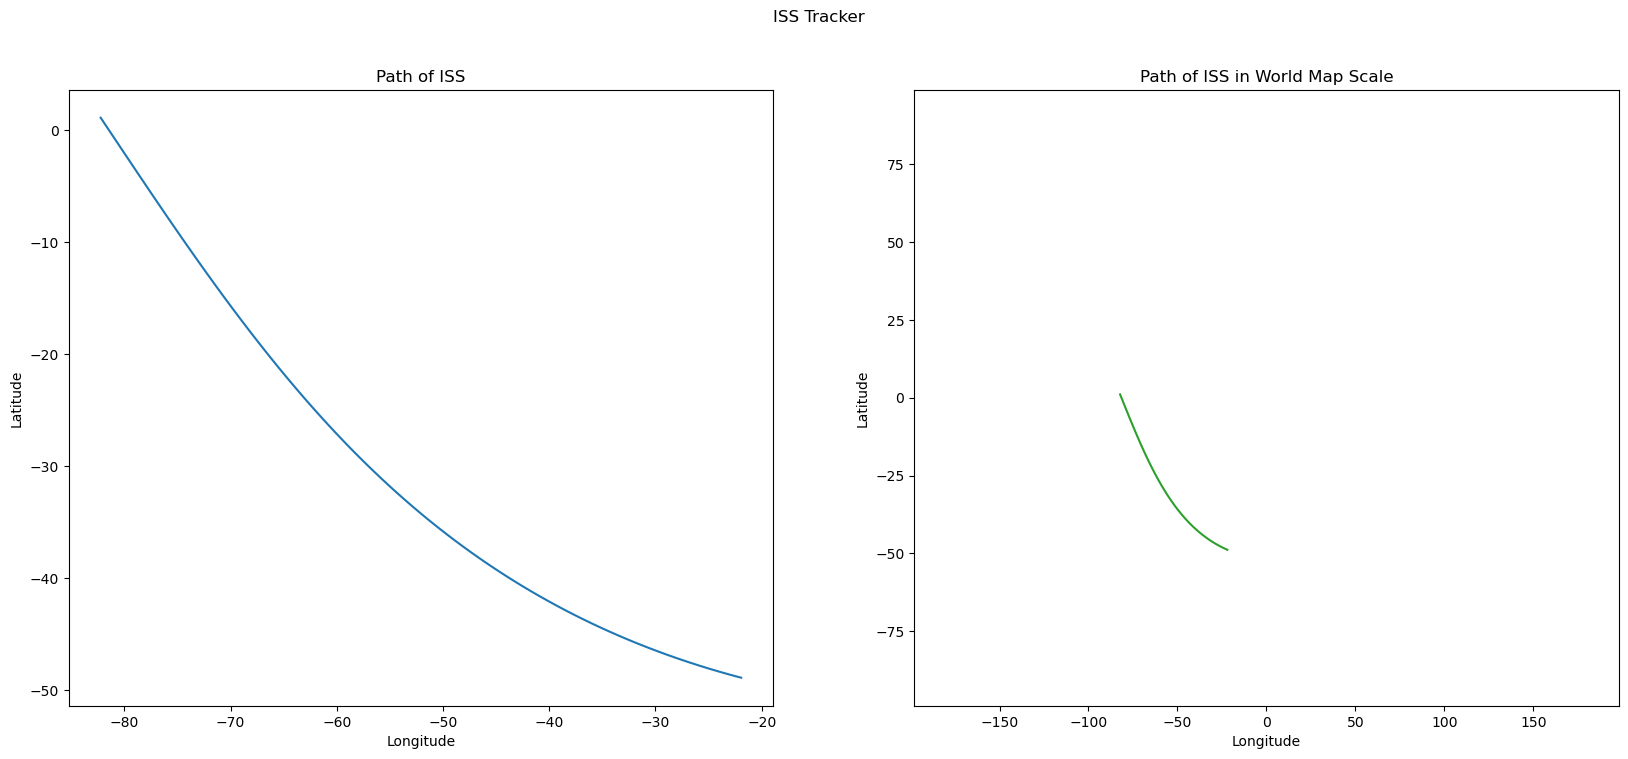

In [5]:
import requests
import matplotlib.pyplot as plt
import time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('ISS Tracker')

x_values = []
y_values = []
x_max = 180
y_max = 90
x_min = -180
y_min = -90
ax2.plot(x_max, y_max)
ax2.plot(x_min, y_min)

time_response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
time_data = time_response.json()
print("Start: " + str(time_data.get("timestamp")))

for i in range(0,100):
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    time.sleep(10)

    

    if response.status_code == 200:
        data = response.json()

        latitude = data.get("latitude")

        longitude = data.get("longitude")

        x_values.append(longitude)
        y_values.append(latitude)



ax1.plot(x_values,y_values)
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.title.set_text("Path of ISS")

ax2.plot(x_values,y_values)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.title.set_text("Path of ISS in World Map Scale")

time_response_2 = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
time_data_2 = time_response_2.json()
print("End: " + str(time_data_2.get("timestamp")))

plt.show()